In [1]:
#A DecisionTreeClassifier is a supervised machine learning algorithm used for classification problems.
# It works like a flowchart that asks a sequence of questions about the data to make a decision.
# Splitting Criteria (Very Important)

# Decision trees choose splits using impurity measures:
# Gini Impurity (default)
# Entropy (Information Gain)

# The model splits the data based on feature values

# Each split tries to separate classes as purely as possible

# This continues until:

# all samples in a node belong to one class, or

# a stopping condition is met

# Is Age < 30?
#  ├── Yes → Is Income > 50K? → Class A
#  └── No  → Class B


# Easy to understand & interpret
# ✔ No feature scaling required
# ✔ Handles nonlinear relationships
# ✔ Works with numerical & categorical data

# ❌ Disadvantages

# ✘ Prone to overfitting
# ✘ Sensitive to small data changes
# ✘ Usually lower accuracy than ensembles

# Key Components
# 1️⃣ Root Node

# Top of the tree

# Contains the entire dataset

# 2️⃣ Decision Nodes

# Where a feature-based split happens

# 3️⃣ Leaf Nodes

# Final output (predicted class)

# Overfitting & Control Parameters
# | Parameter           | Purpose                       |
# | ------------------- | ----------------------------- |
# | `max_depth`         | Limits tree depth             |
# | `min_samples_split` | Minimum samples to split      |
# | `min_samples_leaf`  | Minimum samples in leaf       |
# | `max_features`      | Features considered per split |

# 🆚 Decision Tree vs Logistic Regression
# | Feature          | Decision Tree | Logistic Regression |
# | ---------------- | ------------- | ------------------- |
# | Non-linearity    | ✅             | ❌                   |
# | Interpretability | ✅             | ⚠️                  |
# | Scaling needed   | ❌             | ✅                   |
# | Overfitting      | High          | Lower               |


In [2]:
# Entropy is a measure of impurity or randomness in a dataset.

# In Decision Trees, it tells us how mixed the class labels are in a node.

# 🧠 Intuition

# Low entropy → data is mostly one class → good / pure

# High entropy → data is evenly mixed → bad / impure

# Think of a box:

# All red balls → entropy = 0

# Half red, half blue → entropy = maximum
# Entropy=−i=1∑n ​pi​log2​(pi​)

# Binary Classification Example
# Case 1: Pure Node

# All samples belong to one class
# ✅ Perfectly pure
# p1​=1,p2​=0
# Entropy=−(1log2​1+0log2​0)=0

# Case 2: Balanced Classes
# Case 3: Imbalanced Classes

# Entropy in Decision Trees

# Decision Trees use Information Gain:

# Information Gain
# =
# Entropy(parent)
# −
# Weighted Entropy(children)
# Information Gain=Entropy(parent)−Weighted Entropy(children)

# 👉 The split with highest information gain is chosen.

# Entropy measures the impurity of a node in a decision tree and is minimized when all samples belong to the same class.

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np

In [2]:
df = pd.read_csv("../../resource/Heart_Disease_Prediction.csv")
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,Presence
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,Absence
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,Presence
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,Absence
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,Absence


In [3]:
df['Heart Disease'] = df['Heart Disease'].map({"Presence": 1, "Absence": 0})

###### Column cleaning
df.columns = df.columns.str.strip()

# No of columns to be taken for categorization
num_cols = ["Sex", "BP", "Cholesterol", "Max HR", "ST depression"]
cat_cols = ["Sex", "Chest pain type", "FBS over 120", "EKG results", "Exercise angina", "Slope of ST", "Number of vessels fluro", "Thallium"]
df.head()

,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,70,1,4,130,322,0,2,109,0,2.4,2,3,3,1
1,67,0,3,115,564,0,2,160,0,1.6,2,0,7,0
2,57,1,2,124,261,0,0,141,0,0.3,1,0,7,1
3,64,1,4,128,263,0,0,105,1,0.2,2,1,7,0
4,74,0,2,120,269,0,2,121,1,0.2,1,1,3,0


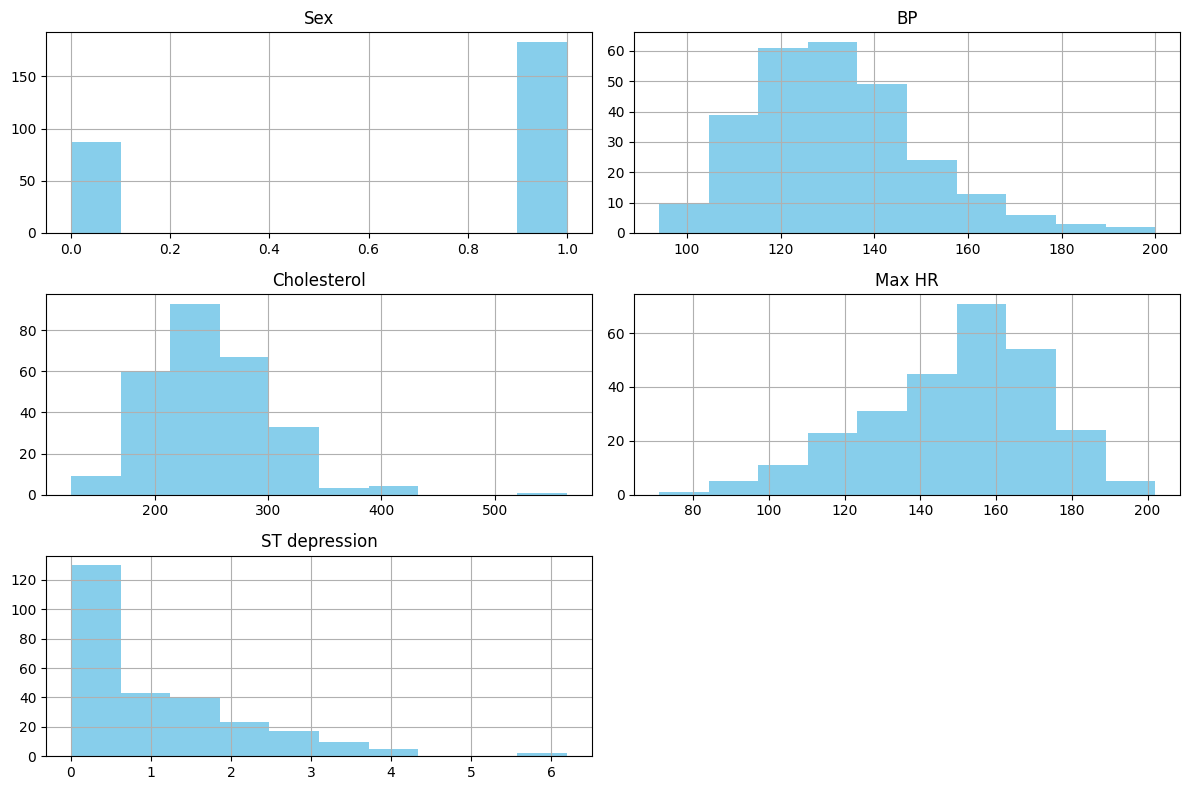

In [4]:
df[num_cols].hist(figsize=(12, 8), color="Skyblue")
plt.title("Columns Histogram data")
plt.tight_layout()
plt.show()

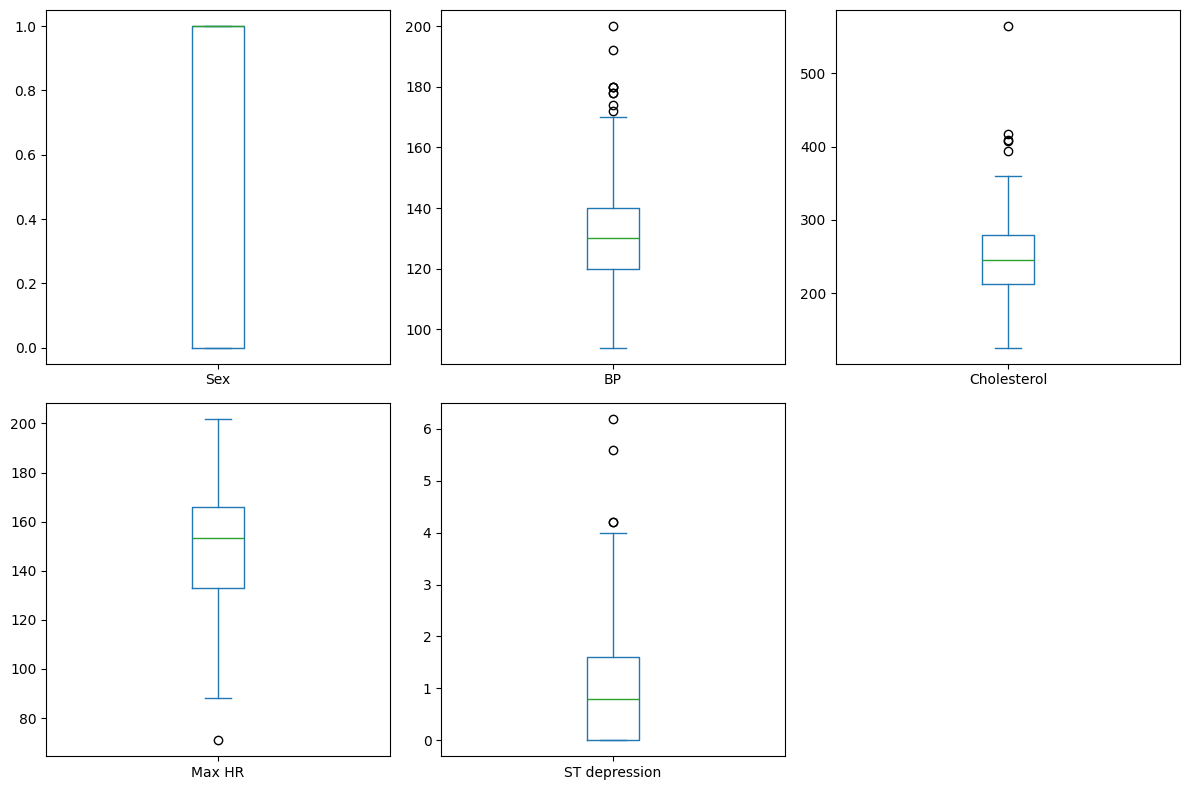

In [5]:
## BOX plots for outliers
# A boxplot identifies potential outliers using statistics, Interquartile Range (IQR)

# What you see on the boxplot

# Box → values between Q1 and Q3
# Line inside box → median
# Whiskers → values within the bounds
# Dots beyond whiskers → outliers

df[num_cols].plot(kind="box", figsize=(12, 8), subplots=True, layout=(2, 3))
plt.tight_layout()
plt.show()

## As you can see the outliers of data here those are in black dot balls
# We will remove those outliers

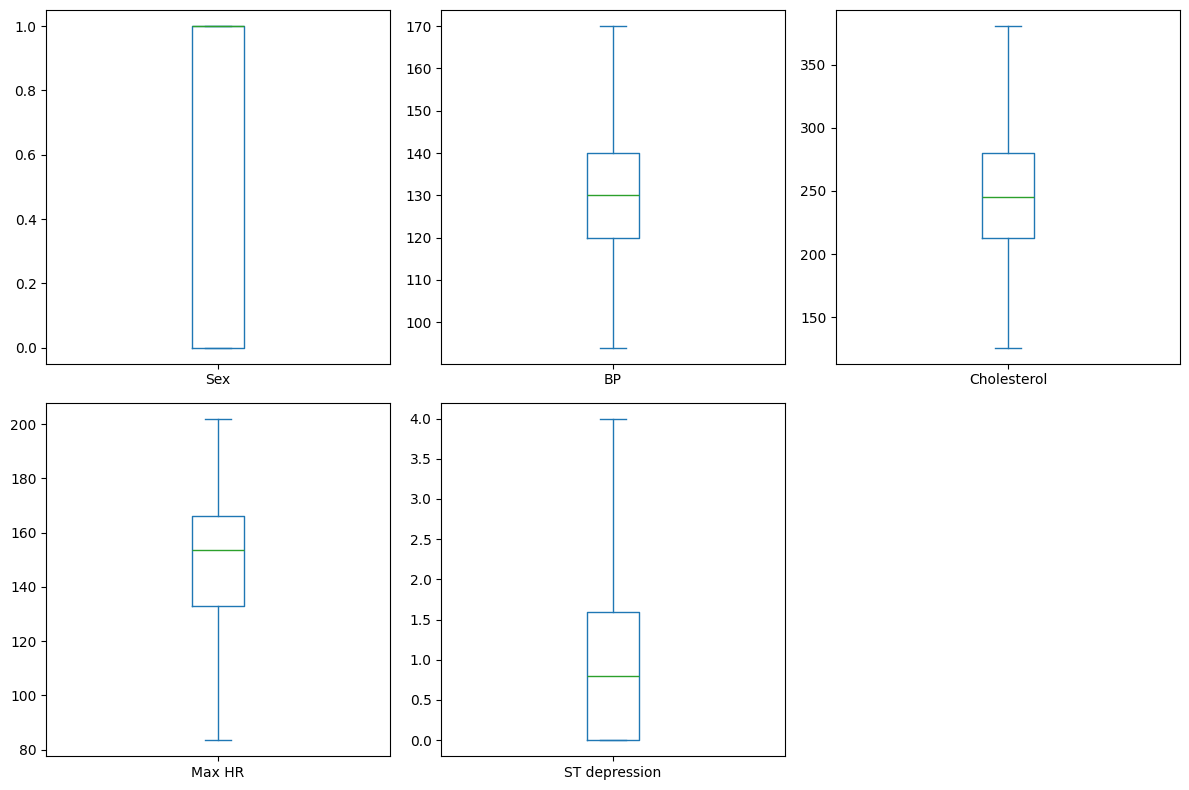

In [6]:
# np.where(condition, value_if_true, value_if_false)

for col in num_cols:
    Q1 = df[col].quantile(0.25)
    Q3 = df[col].quantile(0.75)
    IQR = Q3 - Q1
    low = Q1 - 1.5 * IQR
    high = Q3 + 1.5 * IQR
    df[col] = np.where(df[col] < low, low, np.where(df[col] > high, high, df[col]))


## Plotting the box to see that again  after removing the outliers
df[num_cols].plot(kind="box", subplots=True, layout=(2, 3), figsize=(12, 8))
plt.tight_layout()
plt.show()

#As You can see the outliers has been removed here


In [7]:
# Decision Trees do NOT need MinMaxScaler (or any feature scaling).
# Decision Trees work by splitting data based on thresholds, not distances.

# Algorithms that DO NOT need scaling

# DecisionTreeClassifier
# RandomForest
# ExtraTrees
# Gradient Boosting (XGBoost, LightGBM, CatBoost)

In [10]:
# Lets create Test Data and Splits
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.model_selection import train_test_split
from sklearn.metrics import ConfusionMatrixDisplay

In [9]:
# Splitting the data data and labels
# axis=1 is row wise (and removing all the column data)

X = df.drop('Heart Disease', axis=1)
y = df['Heart Disease']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Creating Model
model = DecisionTreeClassifier(max_depth=5, )
model.fit(X_train, y_train) # Training the model
preds = model.predict(X_test)

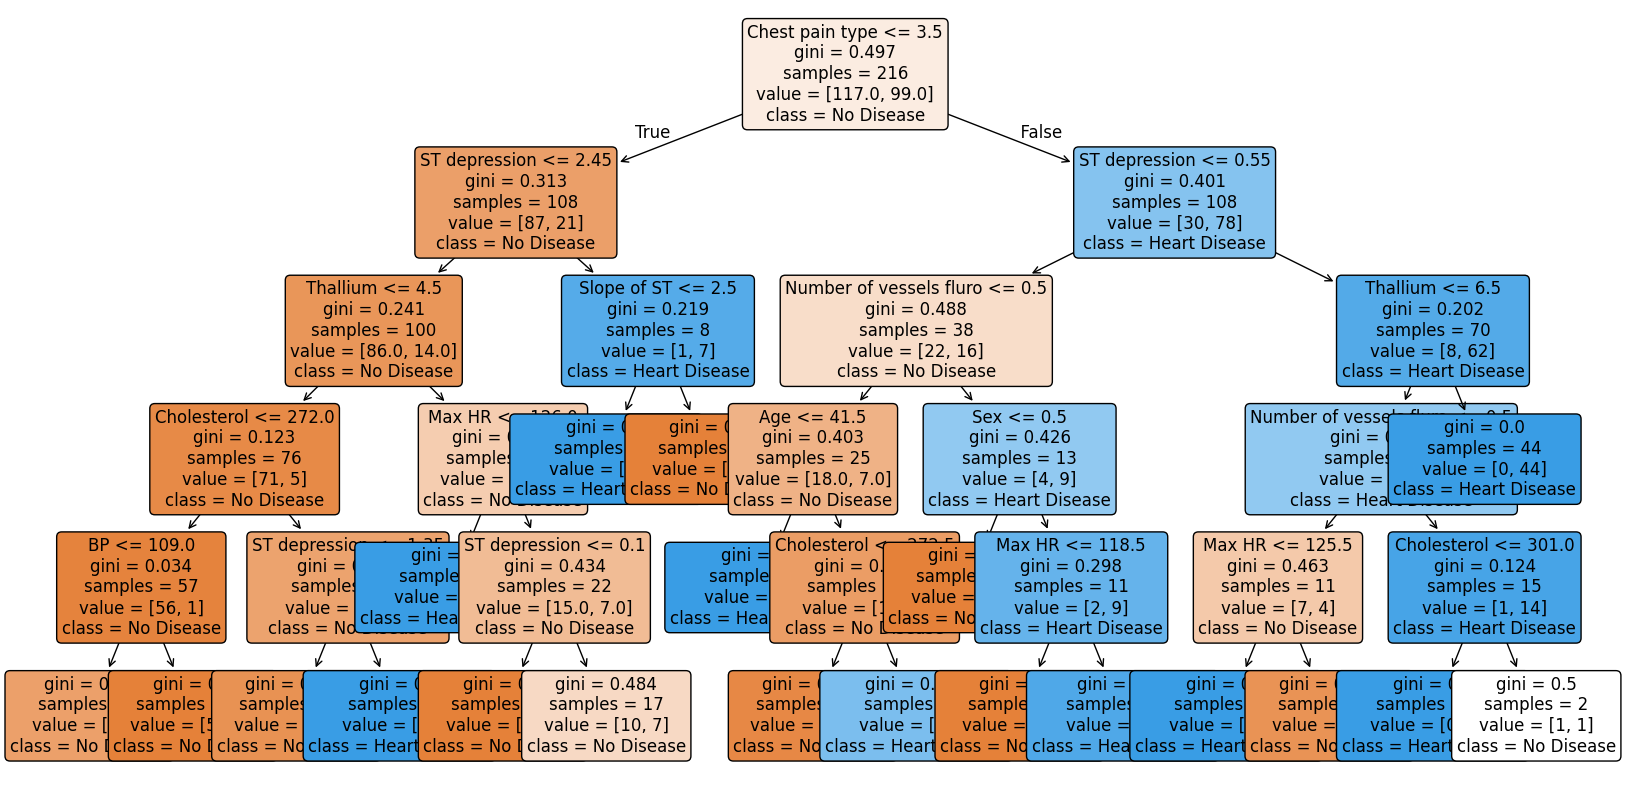

In [11]:
plt.figure(figsize=(20,10))
plot_tree(
    model,
    feature_names=X.columns,
    class_names=['No Disease', 'Heart Disease'],  # adjust labels as needed
    filled=True,
    rounded=True,
    fontsize=12
)
plt.show()

In [ ]:
# 1️⃣ Random Forest vs Decision Tree

# | Feature                | Decision Tree                                       | Random Forest                                                       |
# | ---------------------- | --------------------------------------------------- | ------------------------------------------------------------------- |
# | **Basic idea**         | Single tree splits data based on feature thresholds | Ensemble of many trees trained on random subsets of data & features |
# | **Overfitting**        | High, especially on small datasets                  | Much lower due to averaging many trees                              |
# | **Accuracy**           | Moderate                                            | Higher, more robust                                                 |
# | **Feature importance** | Can be unstable                                     | More reliable (averaged over many trees)                            |
# | **Interpretability**   | Very high (easy to visualize single tree)           | Lower (hard to visualize all trees)                                 |
# | **Training time**      | Fast                                                | Slower (multiple trees)                                             |
